Gerando gráficos com a previsão definida...


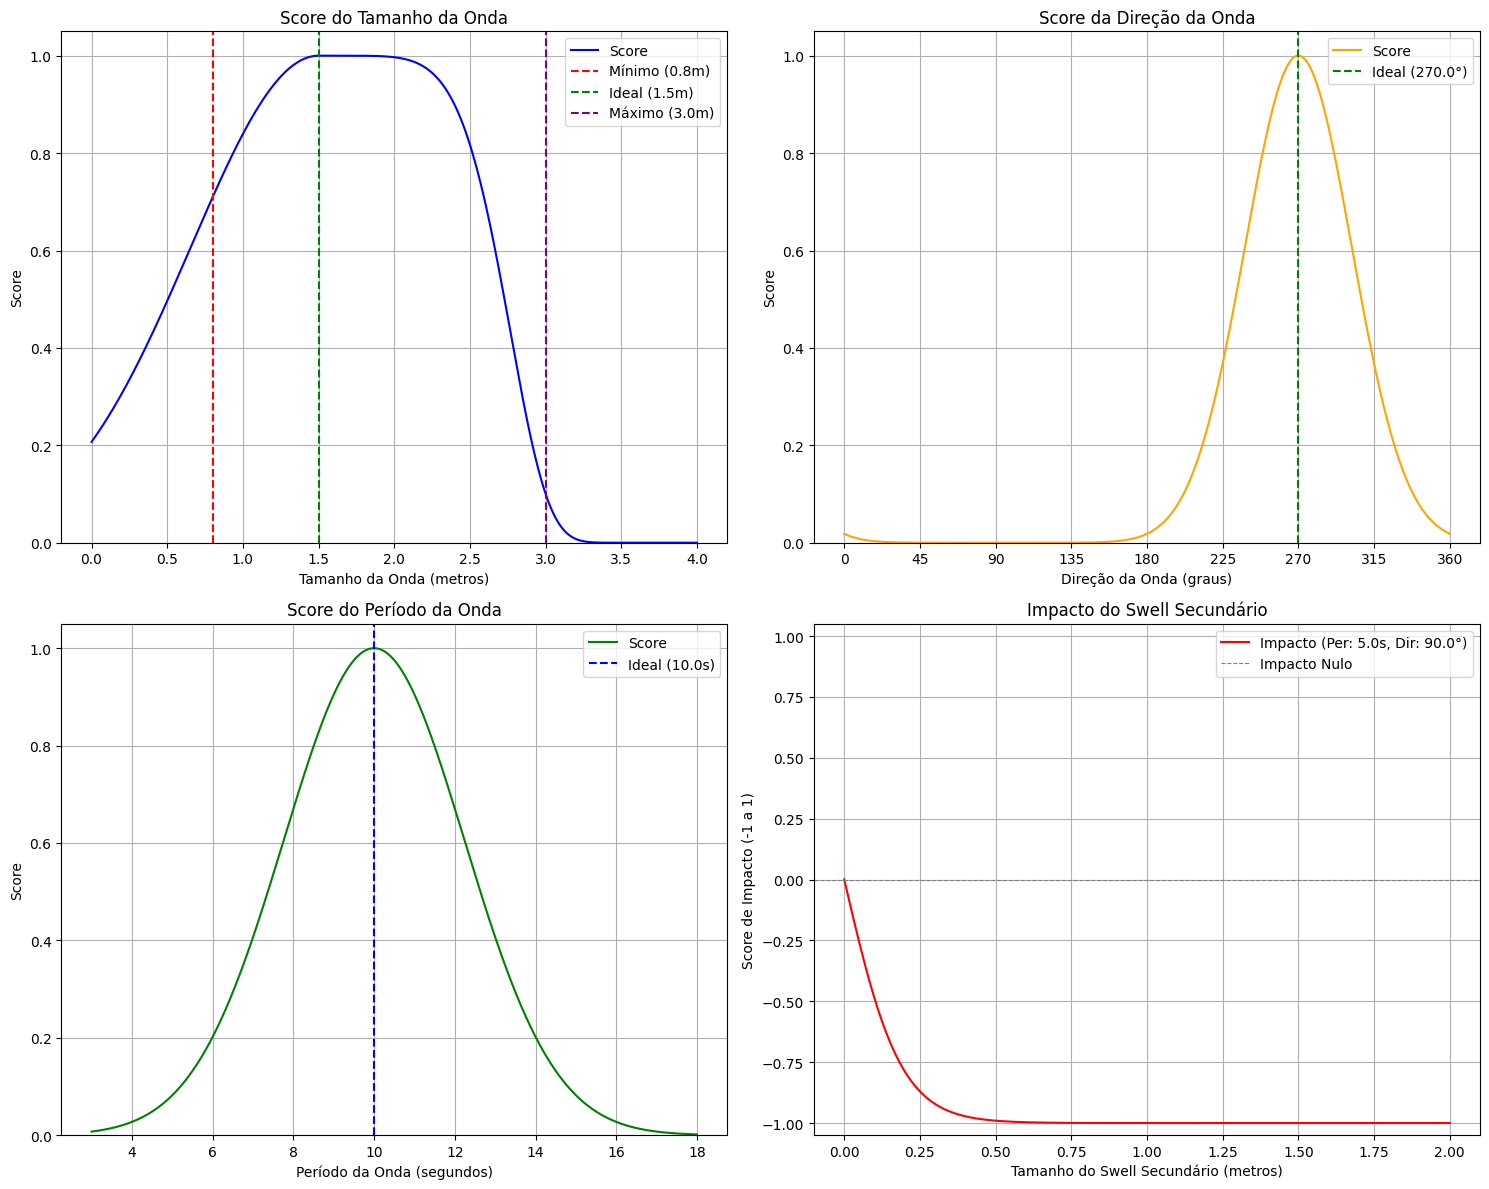

Geração de gráficos concluída.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from wave_score import (
    calcular_score_tamanho_onda,
    calcular_score_direcao_onda,
    calcular_score_periodo_onda,
    calcular_impacto_swell_secundario
)

# --- 1. Definição da Previsão ---
# Defina aqui os parâmetros da onda principal e do swell secundário para análise.
# Você pode alterar esses valores para simular diferentes cenários.

# Parâmetros da Onda Principal (Primária)
previsao_onda_principal = {
    'tamanho': 1.8,   # metros
    'periodo': 9.0,   # segundos
    'direcao': 270.0  # graus (Ex: Oeste)
}

# Parâmetros do Swell Secundário
# Cenário de exemplo para o impacto. Ajuste conforme necessário.
previsao_swell_secundario = {
    'tamanho': 0.7,   # metros (Tamanho do swell secundário. Se for pequeno, o impacto será próximo de 0)
    'periodo': 5.0,   # segundos (Curto em relação ao principal, para gerar impacto negativo)
    'direcao': 90.0   # graus (Oposto ao principal, para gerar impacto negativo)
}

# Parâmetros para as funções de Score (ideais, mínimos, máximos)
parametros_score = {
    'tamanho': {
        'minimo': 0.8,
        'ideal': 1.5,
        'maximo': 3.0
    },
    'direcao': {
        'ideal': 270.0 # Direção ideal para o local
    },
    'periodo': {
        'ideal': 10.0 # Período ideal (função agora é simétrica em torno do ideal)
    }
}

print("Gerando gráficos com a previsão definida...")

# --- 2. Preparação dos Dados para os Gráficos ---

# Dados para o Gráfico de Tamanho
tamanhos_plot = np.linspace(0, 4.0, 500) 
scores_tamanho = calcular_score_tamanho_onda(
    tamanhos_plot, 
    parametros_score['tamanho']['minimo'], 
    parametros_score['tamanho']['ideal'], 
    parametros_score['tamanho']['maximo']
)

# Dados para o Gráfico de Direção
direcoes_plot = np.linspace(0, 360, 500) 
scores_direcao = calcular_score_direcao_onda(
    direcoes_plot, 
    parametros_score['direcao']['ideal']
)

# Dados para o Gráfico de Período
periodos_plot = np.linspace(3.0, 18.0, 500) 
scores_periodo = calcular_score_periodo_onda(
    periodos_plot, 
    parametros_score['periodo']['ideal']
)

# Dados para o Gráfico de Impacto do Swell Secundário
# Vamos variar o tamanho do swell secundário para este gráfico,
# mantendo período e direção fixos (conforme definidos em previsao_swell_secundario)
tamanhos_swell_sec_impacto_plot = np.linspace(0, 2.0, 200) # Variar o tamanho do swell secundário
impactos_swell_secundario = calcular_impacto_swell_secundario(
    tamanhos_swell_sec_impacto_plot,
    previsao_swell_secundario['periodo'],
    previsao_swell_secundario['direcao'],
    previsao_onda_principal['tamanho'],
    previsao_onda_principal['periodo'],
    previsao_onda_principal['direcao']
)

# --- 3. Geração dos Gráficos em um Grid 2x2 ---

plt.figure(figsize=(15, 12)) # Tamanho maior para acomodar 4 gráficos

# --- Subplot 1: Score do Tamanho da Onda ---
plt.subplot(2, 2, 1) # (linhas, colunas, índice do plot)
plt.plot(tamanhos_plot, scores_tamanho, label='Score', color='blue')
plt.axvline(parametros_score['tamanho']['minimo'], color='red', linestyle='--', label=f'Mínimo ({parametros_score["tamanho"]["minimo"]}m)')
plt.axvline(parametros_score['tamanho']['ideal'], color='green', linestyle='--', label=f'Ideal ({parametros_score["tamanho"]["ideal"]}m)')
plt.axvline(parametros_score['tamanho']['maximo'], color='purple', linestyle='--', label=f'Máximo ({parametros_score["tamanho"]["maximo"]}m)')
plt.xlabel('Tamanho da Onda (metros)')
plt.ylabel('Score')
plt.title('Score do Tamanho da Onda')
plt.grid(True)
plt.legend()
plt.ylim(0, 1.05)


# --- Subplot 2: Score da Direção da Onda ---
plt.subplot(2, 2, 2)
plt.plot(direcoes_plot, scores_direcao, label='Score', color='orange')
plt.axvline(parametros_score['direcao']['ideal'], color='green', linestyle='--', label=f'Ideal ({parametros_score["direcao"]["ideal"]}°)')
plt.xlabel('Direção da Onda (graus)')
plt.ylabel('Score')
plt.title('Score da Direção da Onda')
plt.grid(True)
plt.legend()
plt.ylim(0, 1.05)
plt.xticks(np.arange(0, 361, 45)) # Melhor range para direções


# --- Subplot 3: Score do Período da Onda ---
plt.subplot(2, 2, 3)
plt.plot(periodos_plot, scores_periodo, label='Score', color='green')
plt.axvline(parametros_score['periodo']['ideal'], color='blue', linestyle='--', label=f'Ideal ({parametros_score["periodo"]["ideal"]}s)')
plt.xlabel('Período da Onda (segundos)')
plt.ylabel('Score')
plt.title('Score do Período da Onda')
plt.grid(True)
plt.legend()
plt.ylim(0, 1.05)


# --- Subplot 4: Impacto do Swell Secundário ---
plt.subplot(2, 2, 4)
plt.plot(tamanhos_swell_sec_impacto_plot, impactos_swell_secundario, 
         label=f'Impacto (Per: {previsao_swell_secundario["periodo"]}s, Dir: {previsao_swell_secundario["direcao"]}°)', 
         color='red') # Cor vermelha pois o cenário de exemplo tende a ser negativo
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8, label='Impacto Nulo')
plt.xlabel('Tamanho do Swell Secundário (metros)')
plt.ylabel('Score de Impacto (-1 a 1)')
plt.title('Impacto do Swell Secundário')
plt.grid(True)
plt.legend()
plt.ylim(-1.05, 1.05)


plt.tight_layout() # Ajusta automaticamente o layout para evitar sobreposição
plt.show()

print("Geração de gráficos concluída.")